In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline


# 1 a) + 1 b) i

In [2]:
df_train = pd.read_csv("../data/aps_failure_training_set.csv", na_values = "na")

In [3]:
df_test = pd.read_csv("../data/aps_failure_test_set.csv", na_values = "na")

In [4]:
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [5]:
df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [6]:
df_train['ab_000'].fillna(int(df_train['ab_000'].mean()), inplace=True)
df_test['ab_000'].fillna(int(df_test['ab_000'].mean()), inplace=True)


In [7]:
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [8]:
df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [9]:
a = list(df_train.columns)
a

['class',
 'aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 '

In [10]:
X_cols = []
for i in range(1,len(a)):
    X_cols.append(a[i])

In [11]:
y_cols = []
for i in range(0,1):
    y_cols.append(a[i])

In [12]:
all_cols = []
for i in range(0,len(a)):
    all_cols.append(a[i])

In [13]:
for i in range(0,len(X_cols)):
    df_train[(X_cols[i])].fillna(int(df_train[(X_cols[i])].mean()), inplace=True)
    df_test[(X_cols[i])].fillna(int(df_test[(X_cols[i])].mean()), inplace=True)
    

In [14]:
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,190620.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [15]:
df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [16]:
df = pd.concat([df_train, df_test],ignore_index=True)

In [17]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,190620.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,neg,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,neg,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [18]:
X_test = df_test.iloc[ : , 1:171]

In [19]:
X_train = df_train.iloc[ : , 1:171]

In [20]:
X_total = pd.concat([X_test, X_train],ignore_index=True)


In [21]:
X_total

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
75996,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
75997,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
75998,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [22]:
y_train = df_train.iloc[ : , 0]
y_TRAIN = list(y_train)

y_test = df_test.iloc[ :, 0]
y_TEST = list(y_test)

#y_total = pd.concat([y_TRAIN, y_TEST], ignore_index=True)
y_total = y_TRAIN + y_TEST

y_total = pd.DataFrame(y_total, columns = ['class'])

a = y_total['class']

y_test =  pd.DataFrame(y_test, columns = ['class'])

# 1 b ii)


In [23]:
s = X_total[X_cols].std()

In [24]:
m = X_total[X_cols].mean()

In [25]:
CV = s/m
CV

aa_000      4.328608
ab_000      9.740521
ac_000      2.167648
ad_000    206.787017
ae_000     22.396515
             ...    
ee_007      4.885086
ee_008      3.335019
ee_009      5.753923
ef_000     50.223681
eg_000     47.845392
Length: 170, dtype: float64

# 1 b iii)

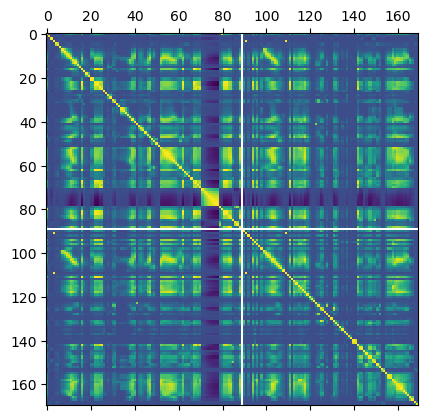

In [26]:
plt.matshow(X_total.corr())


In [27]:
features = list(X_total.values)
CV = np.asarray(CV)

In [28]:
var = CV
var

array([  4.32860784,   9.74052141,   2.16764841, 206.7870169 ,
        22.3965153 ,  18.21272893,  91.46905905,  42.08058061,
        17.62492919,   8.75306958,   5.47504984,   2.96421229,
         2.35258214,   2.8124939 ,   6.27497518,  32.16667767,
         2.31553716,  18.50659369,  43.14492243,  78.62682483,
         9.11203562,   9.0672866 ,   2.25423089,   2.27610888,
         3.08589139,   2.85346225,  11.07962372, 113.89913895,
        23.18719454,  86.09230226,   5.73047671,   3.8591282 ,
        40.89766093,  49.24540209,  38.34152265,  28.32982871,
        33.04099334,  12.00945604,   3.02191538,   3.24988098,
         3.94371864,  77.46178096,   9.01984015,   7.37491386,
        12.0504506 ,   7.56554296,   2.83780103,   3.06662503,
         8.7043674 ,  15.38188195,  22.41580655,  78.01139063,
         2.68855057,   2.64753236,   2.8869202 ,   2.72995918,
         2.64141223,   2.7033269 ,   2.99693259,   2.822092  ,
         6.70503724,   9.52582981,   2.40994988,   6.69

# 1 b iv)

In [29]:
columns =df[X_cols].columns.values
columns_features=pd.DataFrame(np.column_stack([columns, var]))


In [30]:
columns_features=columns_features.drop(0)


In [31]:
sort = columns_features.sort_values(1, ascending=False)
print("Coeficients of coloumns")
print(sort)

top_floor= sort.head(int(math.floor(math.sqrt(170))))
selected_colomuns_X = df[top_floor[0]]

print("Top 11 Coloumns ")
print(top_floor)

Coeficients of coloumns
          0           1
91   cf_000  207.336206
109  co_000  206.941751
3    ad_000  206.787017
122  cs_009  192.498879
138  dj_000  122.388916
..      ...         ...
75   bo_000     0.46296
76   bp_000    0.426983
77   bq_000    0.400371
78   br_000    0.384005
89   cd_000         0.0

[169 rows x 2 columns]
Top 11 Coloumns 
          0           1
91   cf_000  207.336206
109  co_000  206.941751
3    ad_000  206.787017
122  cs_009  192.498879
138  dj_000  122.388916
27   as_000  113.899139
136  dh_000  112.666802
134  df_000   111.27995
6    ag_000   91.469059
29   au_000   86.092302
19   ak_000   78.626825
51   az_009   78.011391
41   ay_009   77.461781


In [32]:
selected_colomuns_X



,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009
0,2.0,220.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190221.0,190515.0,190620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,202.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2.0,42.0,892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75996,2.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75997,2.0,378.0,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75998,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


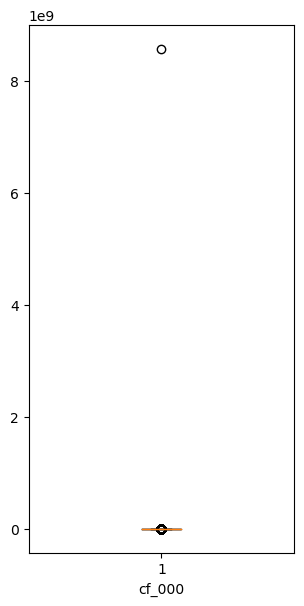

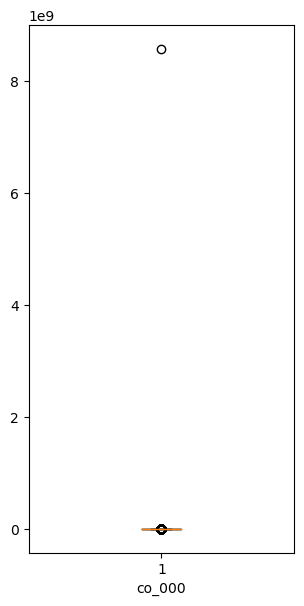

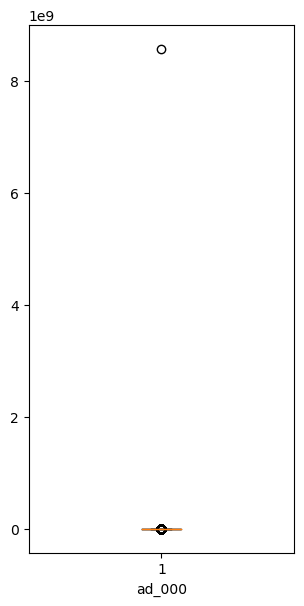

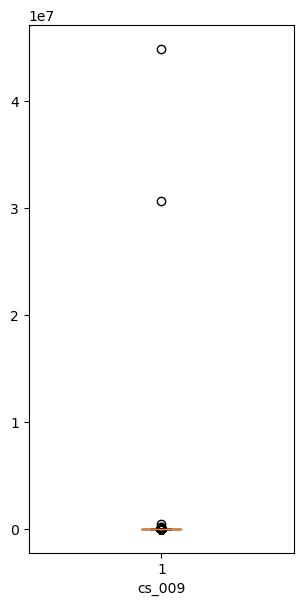

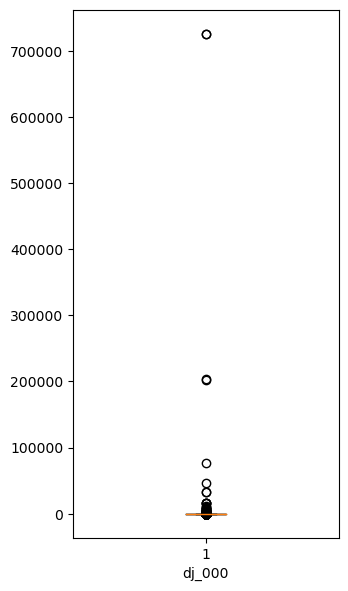

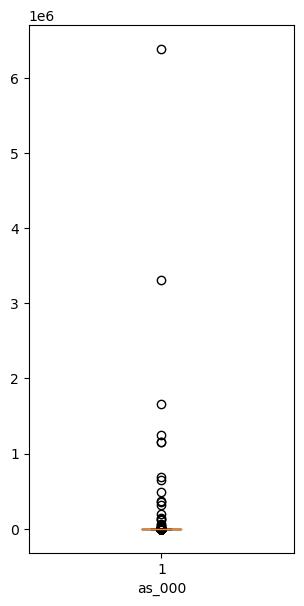

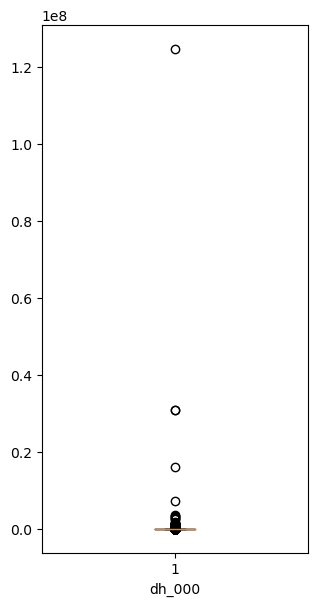

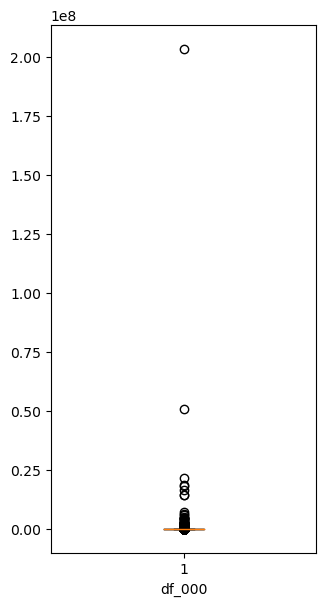

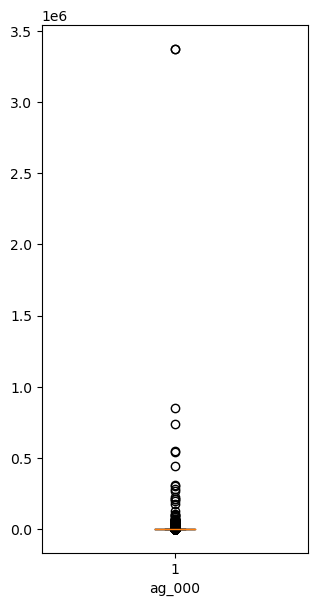

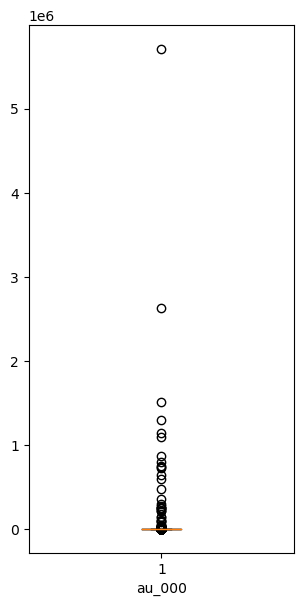

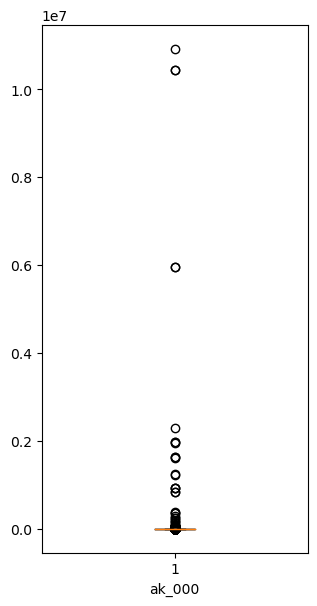

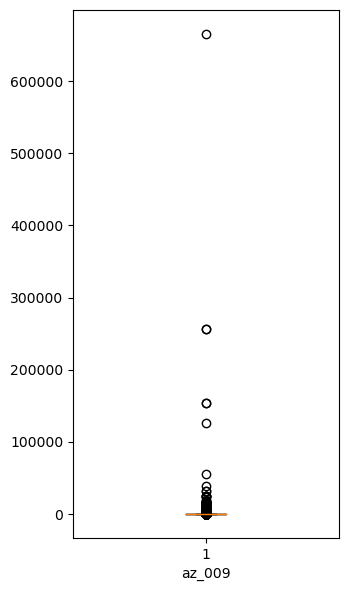

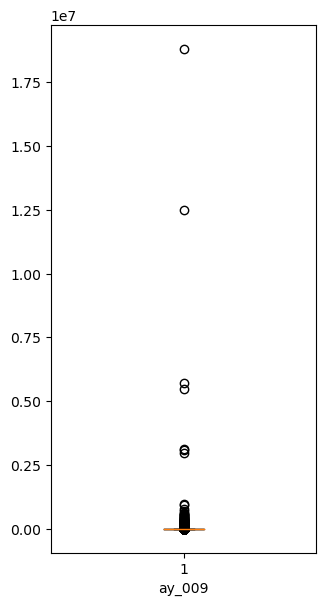

In [33]:
Bplots = selected_colomuns_X.columns
a=1
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
for column in Bplots:
    plt.subplots(figsize=(24, 48))
    plt.subplot(6,6,a)
    plt.xlabel(column)
    plt.boxplot(selected_colomuns_X[column])
    a=a+1

In [34]:
selected_colomuns_X['class'] = y_total

In [35]:
sns.pairplot(selected_colomuns_X, hue = 'class', diag_kind = None)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/ramandepjagdev/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6x/mtzg0k9d1jnc6j1lxtdzh9pm0000gn/T/ipykernel_98914/1188739474.py", line 1, in <module>
    sns.pairplot(selected_colomuns_X, hue = 'class', diag_kind = None)
  File "/Users/ramandepjagdev/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "/Users/ramandepjagdev/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py", line 2140, in pairplot
    plotter(scatterplot, **plot_kws)
  File "/Users/ramandepjagdev/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py", line 1341, in map
    self._map_bivariate(func, indices, **kwargs)
  File "/Users/ramandepjagdev/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py", line 1539, in _map_bivariate
    self._plot_bivariat

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x7fab12e28700> (for post_execute):


KeyboardInterrupt: 

In [ ]:
'''y_train = df_train.iloc[ : , 0]
y_TRAIN = list(y_train)

y_test = df_test.iloc[ :, 0]
y_TEST = list(y_test)

#y_total = pd.concat([y_TRAIN, y_TEST], ignore_index=True)
y_total = y_TRAIN + y_TEST

y_total = pd.DataFrame(y_total, columns = ['class'])

a = y_total['class']

y_test =  pd.DataFrame(y_test, columns = ['class'])'''

# 1 b V)

In [40]:
a = y_total['class']


neg_count = 0
pos_cound = 0
for i in range(len(df_train)):
    if a[i] == "neg":
        neg_count = neg_count + 1
    else:
        pos_cound = pos_cound + 1 

print("Negative classes in total data: ", neg_count)
print("Positive classes in total data: ", pos_cound)

Negative classes in total data:  59000
Positive classes in total data:  1000


In [41]:
neg_count = 0
pos_cound = 0
for i in range(len(df_train)):
    if df_train['class'][i] == "neg":
        neg_count = neg_count + 1
    else:
        pos_cound = pos_cound + 1 
        
print("Negative classes in training data:",neg_count)
print("Positive classes in training data: ",pos_cound)

Negative classes in training data: 59000
Positive classes in training data:  1000


In [42]:
neg_count = 0
pos_cound = 0
for i in range(len(df_test)):
    if df_test['class'][i] == "neg":
        neg_count = neg_count + 1
    else:
        pos_cound = pos_cound + 1 
        
print("Negative classes in test data:",neg_count)
print("Positive classes in test data: ",pos_cound)

Negative classes in test data: 15625
Positive classes in test data:  375


### yes the dataset is imbalcned because the dominant class makes up 59000/60000 of the training set (98.33%)  and the 15625/16000 of the test set (97.65%)

# 1 C)

In [43]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [44]:
y_train = pd.DataFrame(y_TRAIN, columns = ['class'])
y_train
y_train.replace(('pos', 'neg'), (1, 0), inplace=True)
y_train

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


In [45]:
y_test =  pd.DataFrame(y_test, columns = ['class'])
y_test
y_test.replace(('pos', 'neg'), (1, 0), inplace=True)
y_test

,class
0,0
1,0
2,0
3,0
4,0
...,...
15995,0
15996,0
15997,0
15998,0


In [46]:
y_total = pd.concat([y_train,y_test], ignore_index=True)

In [47]:
X_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [48]:
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,190620.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


### 1C training data)

In [49]:
clf = RandomForestClassifier(max_depth= 5 , oob_score=True) 
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, oob_score=True)

In [50]:
y_pred_train = clf.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("confusion matrix for training data")
print(confusion_matrix_train)
#rfe_score  = roc_auc_score( y_pred_train, y_train)

confusion matrix for training data
[[58970    30]
 [  431   569]]


In [51]:
rfe_score_1 = confusion_matrix_train[0][1] + confusion_matrix_train[1][0]
sum_score = (confusion_matrix_train[0][0] + confusion_matrix_train[1][1]+confusion_matrix_train[0][1] + confusion_matrix_train[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("Missclassification rate for Random Forest Test data: ", rfe_score)

Missclassification rate for Random Forest Test data:  0.007683333333333334


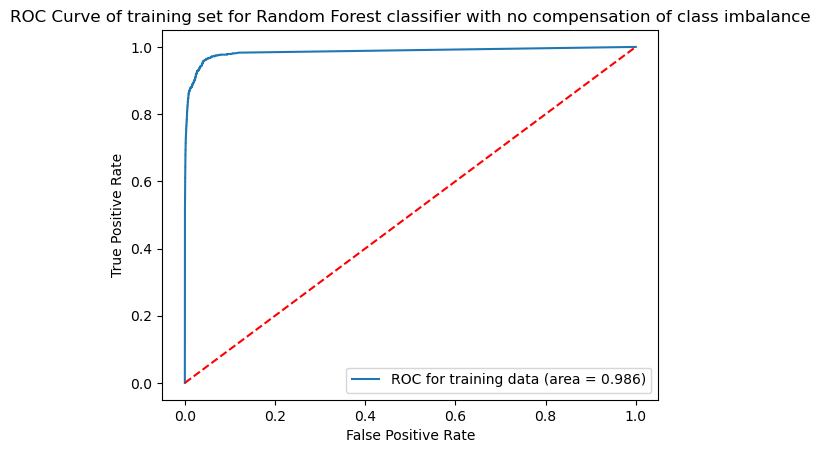

In [52]:
fpr, tpr, thresholds= roc_curve(y_train, clf.predict_proba(X_train)[:,1])  # calculates the false positive rate, true positive rate
auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC for training data (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of training set for Random Forest classifier with no compensation of class imbalance')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [53]:
from sklearn.metrics import classification_report
 
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59000
           1       0.95      0.57      0.71      1000

    accuracy                           0.99     60000
   macro avg       0.97      0.78      0.85     60000
weighted avg       0.99      0.99      0.99     60000



## 1 C Test data

In [54]:
y_pred = clf.predict(X_test)

confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print("confusion matrix for test data")

print(confusion_matrix_1)
rfe_score = roc_auc_score(y_test,y_pred)


confusion matrix for test data
[[15609    16]
 [  177   198]]


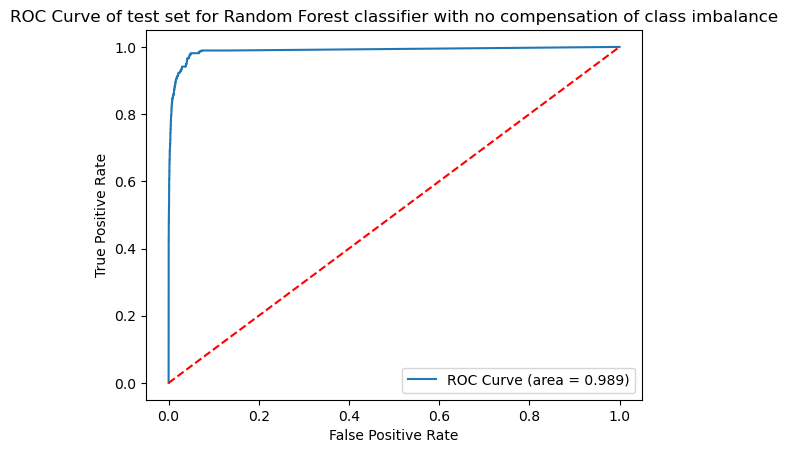

In [57]:
fpr, tpr, thresholds= roc_curve(y_test, clf.predict_proba(X_test)[:,1])  # calculates the false positive rate, true positive rate
auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test set for Random Forest classifier with no compensation of class imbalance')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



In [58]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.93      0.53      0.67       375

    accuracy                           0.99     16000
   macro avg       0.96      0.76      0.83     16000
weighted avg       0.99      0.99      0.99     16000



In [59]:
print(1 - clf.oob_score_)


0.009066666666666667


In [60]:
rfe_score_1 = confusion_matrix_1[0][1] + confusion_matrix_1[1][0]
sum_score = (confusion_matrix_1[0][0] + confusion_matrix_1[1][1]+confusion_matrix_1[0][1] + confusion_matrix_1[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("Missclassification rate for Random Forest Test data: ", rfe_score)

Missclassification rate for Random Forest Test data:  0.0120625


# comparing Out of bag error and test error

### the OOB error is 0.009066666666666667 where as the Test error is 0.0120625, so the Test error is slighly higher than OOB error


# 1 d) training

In [61]:
clf_balanced = RandomForestClassifier(max_depth= 10 , oob_score=True, class_weight = 'balanced') 
clf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, oob_score=True)

In [62]:
y_pred_train_balanced = clf_balanced.predict(X_train)
confusion_matrix_train_balanced = confusion_matrix(y_train, y_pred_train_balanced)
print("confusion matrix for training data")
print(confusion_matrix_train_balanced)


confusion matrix for training data
[[57889  1111]
 [   14   986]]


In [63]:
rfe_score_1 = confusion_matrix_train_balanced[0][1] + confusion_matrix_train_balanced[1][0]
sum_score = (confusion_matrix_train_balanced[0][0] + confusion_matrix_train_balanced[1][1]+confusion_matrix_train_balanced[0][1] + confusion_matrix_train_balanced[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("Missclassification rate for Random Forest Test data: ", rfe_score)

Missclassification rate for Random Forest Test data:  0.01875


In [64]:
print(classification_report(y_train, y_pred_train_balanced))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59000
           1       0.47      0.99      0.64      1000

    accuracy                           0.98     60000
   macro avg       0.73      0.98      0.81     60000
weighted avg       0.99      0.98      0.98     60000



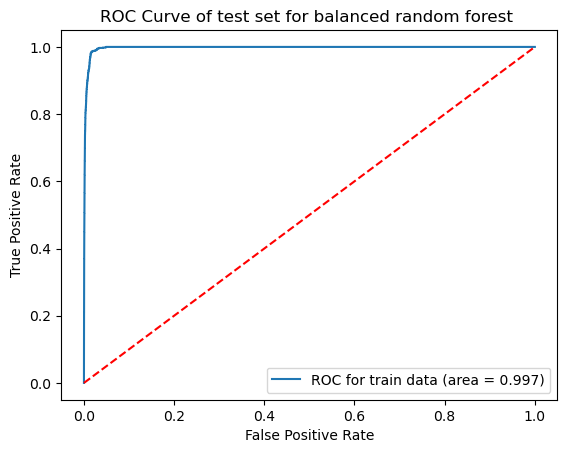

In [65]:
fpr, tpr, thresholds= roc_curve(y_train, clf_balanced.predict_proba(X_train)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC for train data (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test set for balanced random forest ')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 1 d test)

In [66]:
y_pred_balanced = clf_balanced.predict(X_test)

confusion_matrix_test_balanced = confusion_matrix(y_test, y_pred_balanced)
print("confusion matrix for test data for balanced random forest" )

print(confusion_matrix_test_balanced)
rfe_score = roc_auc_score(y_test, y_pred_balanced)

confusion matrix for test data for balanced random forest
[[15321   304]
 [   34   341]]


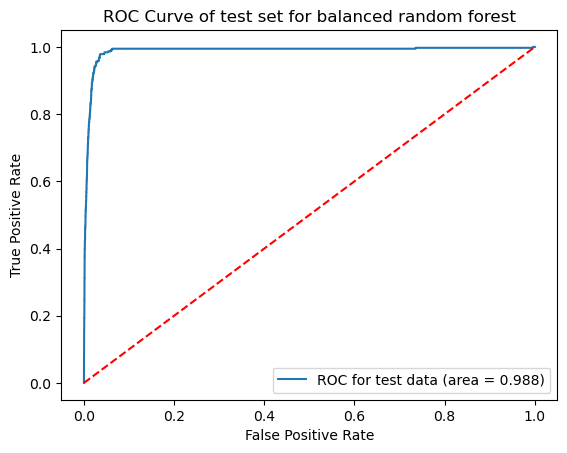

In [67]:
fpr, tpr, thresholds= roc_curve(y_test, clf_balanced.predict_proba(X_test)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC for test data (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test set for balanced random forest')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.53      0.91      0.67       375

    accuracy                           0.98     16000
   macro avg       0.76      0.94      0.83     16000
weighted avg       0.99      0.98      0.98     16000



In [69]:
print("OOB error rate for Balanced data: " , 1 - clf_balanced.oob_score_)


OOB error rate for Balanced data:  0.021649999999999947


In [70]:
rfe_score_1 = confusion_matrix_test_balanced[0][1] + confusion_matrix_test_balanced[1][0]
sum_score = (confusion_matrix_test_balanced[0][0] + confusion_matrix_test_balanced[1][1]+confusion_matrix_test_balanced[0][1] + confusion_matrix_test_balanced[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("Missclassification rate for Balanced Random Forest Test data: ", rfe_score)

Missclassification rate for Balanced Random Forest Test data:  0.021125


# Comparison of results from 1c)
### comparing the results from one C, the OOB error rate is 0.0217 and the Missclassification rate is 0.0211, therefore they are nearly similar. comparing this to 1 C the Missclassifcation rate was slighly larger than the OOB score for 1c ( OOB for unbalanced =  0.009066666666666667 and Missclasication rate for unbalanced = 0.0120625

# 1 e) 

In [72]:
#https://www.datacamp.com/tutorial/xgboost-in-python

In [71]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

#L1_REG_MSE = []

for l in alphas:
    xgb = XGBClassifier(objective ='reg:logistic', use_label_encoder =False, alpha = l,  max_depth = 2)
    xgb.fit(X_train, y_train)
    # dont need to worry about class imbalance so dont need to do stratied Kfold 
    cv_score = cross_val_score(xgb, X_train, y_train, cv=KFold(n_splits = 5), scoring='accuracy') 
    print(l)
    print("test error", 1- cv_score)

0.0001
test error [0.00766667 0.00641667 0.00625    0.0065     0.00683333]
0.001
test error [0.00766667 0.00641667 0.00625    0.0065     0.00683333]
0.01
test error [0.00733333 0.0065     0.00625    0.0065     0.00641667]
0.1
test error [0.00775    0.00633333 0.00641667 0.00708333 0.0065    ]
1
test error [0.00725    0.00641667 0.00633333 0.00716667 0.00725   ]
10
test error [0.00758333 0.00616667 0.0075     0.00741667 0.00741667]
100
test error [0.013      0.00975    0.00991667 0.01025    0.01016667]
1000
test error [0.019      0.01791667 0.01616667 0.01533333 0.01491667]
10000
test error [0.019      0.01791667 0.01616667 0.01533333 0.01491667]


# best alphas is a = 0.01 because it produces the lowest test error 


In [73]:
#from xgboost import XGBRegressor
xg_reg = XGBClassifier(objective ='reg:logistic', use_label_encoder =False, alpha = 0.01, max_depth = 2)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))

In [74]:
#y_pred = clf.predict(X_test)
#y_pred_train = clf.predict(X_train)
y_pred_train_XGBoost = xg_reg.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_XGBoost)
print("confusion matrix for training data for XGB Boost")
print(confusion_matrix_train)


confusion matrix for training data for XGB Boost
[[58964    36]
 [  181   819]]


In [75]:
rfe_score_1 = confusion_matrix_train[0][1] + confusion_matrix_train[1][0]
sum_score = (confusion_matrix_train[0][0] + confusion_matrix_train[1][1]+confusion_matrix_train[0][1] + confusion_matrix_train[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("training error for XGBoost:", rfe_score)


training error for XGBoost: 0.0036166666666666665


In [76]:
print(classification_report(y_train, y_pred_train_XGBoost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       0.96      0.82      0.88      1000

    accuracy                           1.00     60000
   macro avg       0.98      0.91      0.94     60000
weighted avg       1.00      1.00      1.00     60000



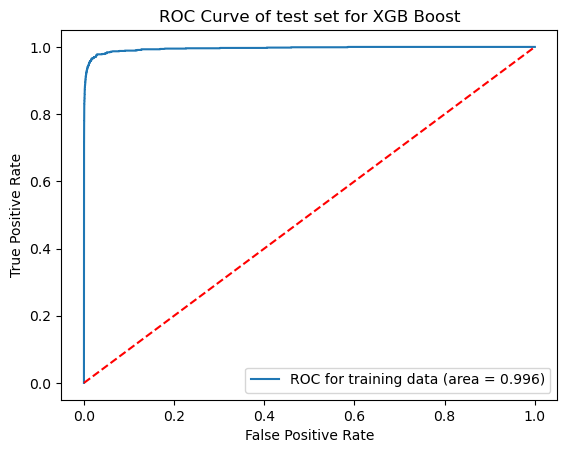

In [77]:
fpr, tpr, thresholds= roc_curve(y_train, xg_reg.predict_proba(X_train)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC for training data (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test set for XGB Boost')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
y_pred_test_XGBoost = xg_reg.predict(X_test)

confusion_matrix_test = confusion_matrix(y_test, y_pred_test_XGBoost)
print("confusion matrix for test data for XGB Boost")
print(confusion_matrix_test)


confusion matrix for test data for XGB Boost
[[15603    22]
 [  111   264]]


In [83]:
rfe_score_1 = confusion_matrix_test[0][1] + confusion_matrix_test[1][0]
sum_score = (confusion_matrix_test[0][0] + confusion_matrix_test[1][1]+confusion_matrix_test[0][1] + confusion_matrix_test[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("test error for XGBoost", rfe_score)

test error for XGBoost 0.0083125


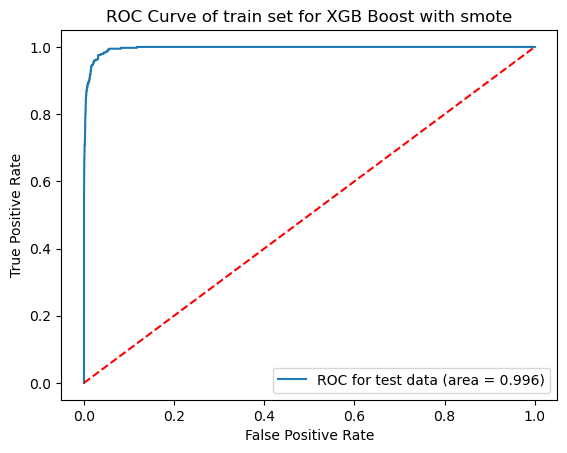

In [80]:
fpr, tpr, thresholds= roc_curve(y_test, xg_reg.predict_proba(X_test)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC for test data (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of train set for XGB Boost with smote')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
print(classification_report(y_test, y_pred_test_XGBoost))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.92      0.70      0.80       375

    accuracy                           0.99     16000
   macro avg       0.96      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000



# Comparison of test error for avg training error using cross validation:

### the test error is at 0.0083125 the avg cross validation error for alpha = 0.01 is 0.00528

# 1 f)

In [ ]:
#SMOTE RIGHT WAY

In [84]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                
                                ['xgb_model', XGBClassifier(objective ='reg:logistic', use_label_encoder = False, max_depth = 3)]])


In [85]:
param_grid = {'xgb_model__reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid , scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5) )

In [86]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['xgb_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=3,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='reg:logistic',
                                                      predictor=None, ...)]]),
             param_grid={'xgb_model__reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000, 10000]},
             scoring='accuracy')

In [87]:
y_pred_train_XGBoost_SMOTE = grid_search.predict(X_train)
confusion_matrix_train_SMOTE = confusion_matrix(y_train, y_pred_train_XGBoost_SMOTE)
print("confusion matrix for training data")
print(confusion_matrix_train_SMOTE)

confusion matrix for training data
[[58771   229]
 [   80   920]]


In [88]:
rfe_score_1 = confusion_matrix_train_SMOTE[0][1] + confusion_matrix_train_SMOTE[1][0]
sum_score = (confusion_matrix_train_SMOTE[0][0] + confusion_matrix_train_SMOTE[1][1]+confusion_matrix_train_SMOTE[0][1] + confusion_matrix_train_SMOTE[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("test error for XGBoostc with smote", rfe_score)

test error for XGBoostc with smote 0.00515


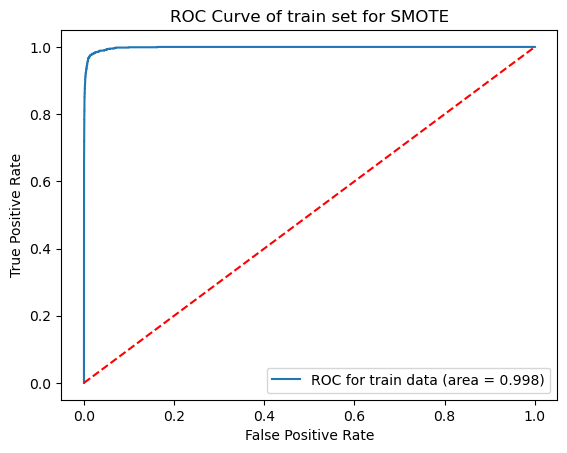

In [89]:
fpr, tpr, thresholds= roc_curve(y_train, grid_search.predict_proba(X_train)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC for train data (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of train set for SMOTE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [90]:
print(classification_report(y_train, y_pred_train_XGBoost_SMOTE))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       0.80      0.92      0.86      1000

    accuracy                           0.99     60000
   macro avg       0.90      0.96      0.93     60000
weighted avg       1.00      0.99      1.00     60000



# f test data)

In [91]:
y_pred_test_XGBoost_SMOTE = grid_search.predict(X_test)
confusion_matrix_test_SMOTE = confusion_matrix(y_test, y_pred_test_XGBoost_SMOTE)


In [92]:
print("confusion matrix for test data")
print(confusion_matrix_test)

confusion matrix for test data
[[15603    22]
 [  111   264]]


In [99]:
rfe_score_1 = confusion_matrix_test_SMOTE[0][1] + confusion_matrix_test_SMOTE[1][0]
sum_score = (confusion_matrix_test_SMOTE[0][0] + confusion_matrix_test_SMOTE[1][1]+confusion_matrix_test_SMOTE[0][1] + confusion_matrix_test_SMOTE[1][0])
#print(sum_score)

rfe_score = (rfe_score_1/sum_score)
print("test error for XGBoost with SMOTE", rfe_score)

test error for XGBoost with SMOTE 0.029125


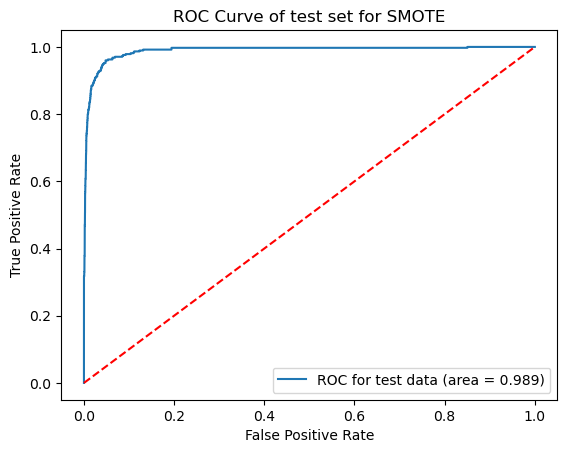

In [94]:
fpr, tpr, thresholds= roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC for test data (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test set for SMOTE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [95]:
print(classification_report(y_test, y_pred_test_XGBoost_SMOTE))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.44      0.91      0.59       375

    accuracy                           0.97     16000
   macro avg       0.72      0.94      0.79     16000
weighted avg       0.98      0.97      0.98     16000



In [98]:
cv_score = grid_search.best_params_
print("Best Smote aplha: ", cv_score)

Best Smote aplha:  {'xgb_model__reg_alpha': 0.1}


# comparison of uncompensated case with smote case
###  Both the XGB an the smote have very high accuracy and hence, very low error rates test error for  SMOTE 0.029125 test error for XGBoost 0.0083125



# 6.6.3
### a) decrease, as s increases, Bj's are becoming smaller and smaller, the model is becoming more flexible which causes a drcrease in training RSS

### b) it will decrease then start going up in a parobolic type shape, as s increases we are making Bj's smaller and smaller and the model is becoming more flexible which causes a inital decrease in test RSS before increasing again; therefore creating a parobolic shape

### c) it will go up, as s goes up, Bj's are shrinking, therefore, becoming more and more flexible,  which will increase varience

### d) decrease, as s goes up from 0, we are shrinking Bjs and the model will be more flexible therefore, reduce bias

### e) this will remain constant because irreducilbe error is independant of the model 

# 6.6.5
### 

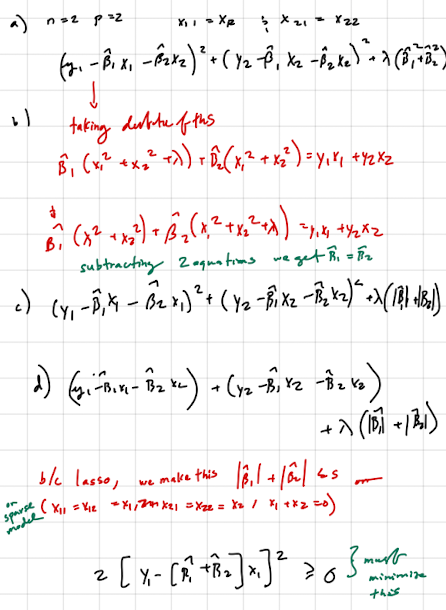

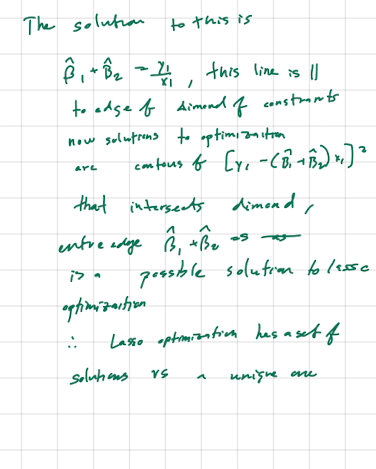

# 8.4.5
### Majority Apporach: we classify to majority class There are 6/10 red predictors, 4/10 for green 

### average proabability apprach we classify X as Green as average of 10 prbabilites which is 0.45 (sum of 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.)/ (N samples = 10)

# 9.7.3

# a)

In [ ]:
x = np.linspace(0,5,1000)
y = x - 0.03
X1 = [3,2,4,1,2,4,4]
X2 = [4,2,4,4,1,3,1]

X = [[3, 2, 4, 1, 2, 4, 4], [4, 2, 4, 4, 1, 3, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b']

In [ ]:
plt.scatter(X[0] , X[1], c = Y)


# b) 1-2X1+2X2 = 0

# c) if its above the line classify to red, if it is not, classify to blue

# d) 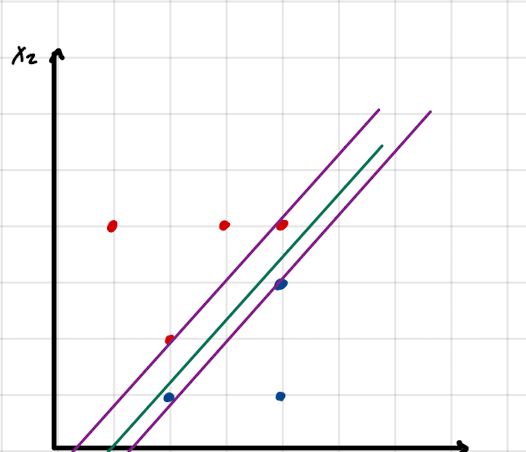

### margin is about 1/4th

# e) (2,1), (2,2), (4,3) and (4,4) 

# f) from the plot we cans ee if we move 4,1, we would not change the maximal margin hyperplane

# g)

In [100]:
x = np.linspace(0,5,1000)
y = x - 0.03
X1 = [3,2,4,1,2,4,4]
X2 = [4,2,4,4,1,3,1]

X = [[3, 2, 4, 1, 2, 4, 4], [4, 2, 4, 4, 1, 3, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b']

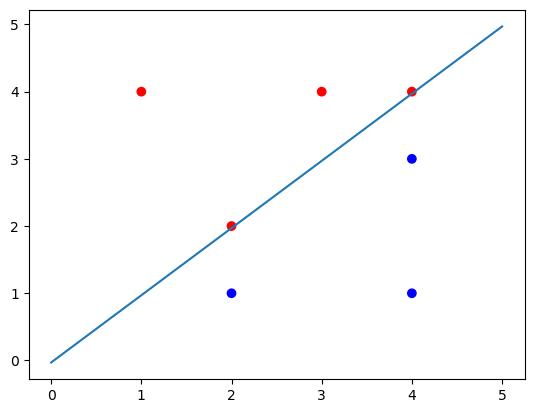

In [101]:
plt.plot(x, y)
plt.scatter(X1 , X2, c = Y)


# H)

In [102]:
x = np.linspace(0,5,1000)
y = x - 0.03
X1 = [3,2,4,1,2,4,4]
X2 = [4,2,4,4,1,3,1]

X = [[3, 2, 4, 1, 2, 4, 4, 3], [4, 2, 4, 4, 1, 3, 1, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b', 'r']

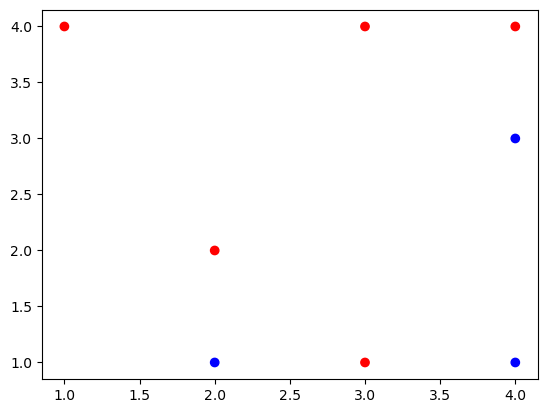

In [103]:
plt.scatter(X[0] , X[1], c = Y)
